<a href="https://colab.research.google.com/github/connordouglas10/DS-Tech-2024spring/blob/main/Module7_Bandits/bandit_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#If opening in colab run this cell
!git clone https://github.com/connordouglas10/DS-Tech-2024spring.git
%cd DS-Tech-2024spring/Module7_Bandits

In [2]:
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
from module_utils import User, plot_share_over_time, get_average_rewards, get_lost_minutes, get_upper_confidence_bound, reset_rewards

Let's start by trying each algorithm once

In [3]:
algorithms = ["A","B", "C", "D"]

In [4]:
rewards, action_plays = reset_rewards(algorithms)

action_0 = "A"
user_0_minutes = User.give_algorithm(action_0)
action_plays.append(action_0)
rewards[action_0].append(user_0_minutes)

action_1 = "B"
user_1_minutes = User.give_algorithm(action_1)
action_plays.append(action_1)
rewards[action_1].append(user_1_minutes)

action_2 = "C"
user_2_minutes = User.give_algorithm(action_2)
action_plays.append(action_2)
rewards[action_2].append(user_2_minutes)

action_3 = "D"
user_3_minutes = User.give_algorithm(action_3)
action_plays.append(action_3)
rewards[action_3].append(user_3_minutes)


How well did each algorithm do?

In [5]:
get_average_rewards(rewards)

{'A': 17.869333850644573,
 'B': 68.0556409269121,
 'C': 8.20488544409635,
 'D': 20.09963661006473}

Now, maybe we try the best algorithm

In [12]:
action_4 = "B"
user_4_minutes = User.give_algorithm(action_4)
print(user_4_minutes)
action_plays.append(action_4)
rewards[action_4].append(user_4_minutes)

27.724598333624535


We could go on like this, but is there a more systematic way to choose which algorithm to serve a given user?

**Enter bandits** (multi-armed bandit, k-armed bandit)

Bandit algorithms are meant to balance **exploration** and **exploitation** in a systematic way to maximize the long term profit/reward

**Explore then commit**

In [13]:
arms = algorithms

In [14]:
rewards, action_plays = reset_rewards(algorithms)
averages = get_average_rewards(rewards)
max_action = None
for user_number in range(10000):
  #explore for the first 5000 users
  if user_number < 5000:
    action = np.random.choice(arms)
    max_action = max(averages, key=averages.get)
  else:
    action = max_action
  reward = User.give_algorithm(action)
  action_plays.append(action)
  rewards[action].append(reward)
  averages = get_average_rewards(rewards)

(100,)


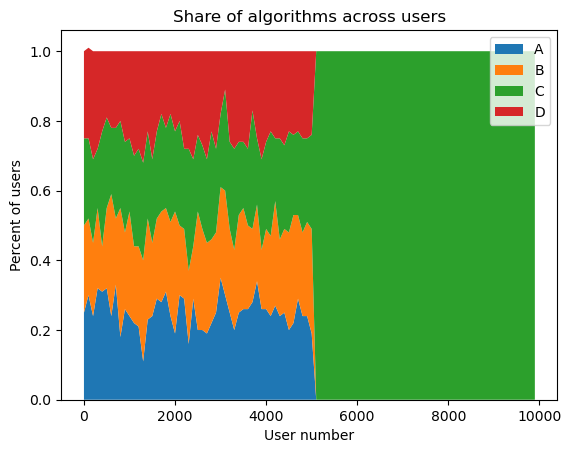

In [15]:
plot_share_over_time(action_plays, ["A","B","C","D"])

In [21]:
get_lost_minutes(action_plays)

Over 10000 users, your strategy was 1632.3907020479674 minutes from the optimal


Epsilon-Greedy

In [18]:
rewards, action_plays = reset_rewards(algorithms)
max_action = None
eps = .1
for user_number in range(10000):
  rand = np.random.uniform(size= 1)[0]
  if rand < eps:
    action = np.random.choice(arms)
  else:
    action = max(averages, key=averages.get)

  reward = User.give_algorithm(action)
  action_plays.append(action)
  rewards[action].append(reward)
  averages = get_average_rewards(rewards)

(100,)


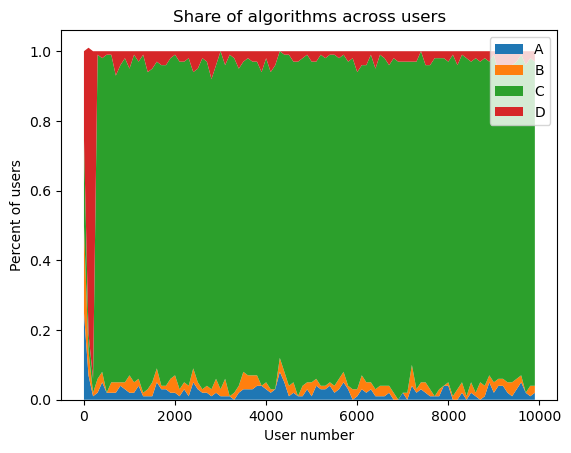

In [19]:
plot_share_over_time(action_plays, ["A","B","C","D"])

In [26]:
get_lost_minutes(action_plays)

Over 10000 users, your strategy was 1027.3052181019157 minutes from the optimal


**Upper Confidence Bound**

In [34]:
rewards, action_plays = reset_rewards(algorithms)
max_action = None
eps = .1
for user_number in range(10000):
  UCBs = get_upper_confidence_bound(rewards,8)
  action = max(UCBs, key=UCBs.get)
  reward = User.give_algorithm(action)
  action_plays.append(action)
  rewards[action].append(reward)
  averages = get_average_rewards(rewards)

(100,)


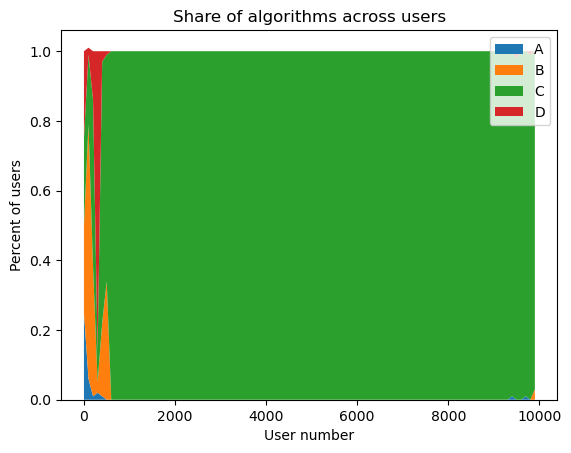

In [35]:
plot_share_over_time(action_plays, ["A","B","C","D"])

In [43]:
get_lost_minutes(action_plays)

Over 10000 users, your strategy was 390.7663724864251 minutes from the optimal
